# Covid-19

In [46]:
# !python -m pip install pycountry-convert

In [97]:
# !python -m pip install countryinfo

In [99]:
import pandas as pd
import plotly.express as px
from datetime import datetime as dt
import pycountry
import pycountry_convert as pc
from countryinfo import CountryInfo
from tqdm import tqdm

tqdm.pandas();

In [2]:
df = pd.read_csv('./data/covid19.csv')

In [3]:
df.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6160 non-null   object 
 1   Country/Region  20097 non-null  object 
 2   Lat             20097 non-null  float64
 3   Long            20097 non-null  float64
 4   Date            20097 non-null  object 
 5   Confirmed       20097 non-null  int64  
 6   Deaths          20097 non-null  int64  
 7   Recovered       20097 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [5]:
df.Date[0]

'1/22/20'

In [6]:
dt.strptime(df.Date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [7]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%y')

In [8]:
df

Province/State         Country/Region       Lat  \
Date                                                                       
2020-01-22                          NaN            Afghanistan  33.00000   
2020-01-22                          NaN                Albania  41.15330   
2020-01-22                          NaN                Algeria  28.03390   
2020-01-22                          NaN                Andorra  42.50630   
2020-01-22                          NaN                 Angola -11.20270   
...                                 ...                    ...       ...   
2020-04-07  Falkland Islands (Malvinas)         United Kingdom -51.79630   
2020-04-07    Saint Pierre and Miquelon                 France  46.88520   
2020-04-07                          NaN            South Sudan   6.87700   
2020-04-07                          NaN         Western Sahara  24.21550   
2020-04-07                          NaN  Sao Tome and Principe   0.18636   

                 Long  Confirmed  Deaths  Recovered  
Date                                                 
2020-01-22  65.000000          0       0          0  
2020-01-22  20.168300          0       0          0  
2020-01-22   1.659600          0       0          0  
2020-01-22   1.521800          0       0          0  
2020-01-22  17.873900          0       0          0  
...               ...        ...     ...        ...  
2020-04-07 -59.523600          2       0          0  
2020-04-07 -56.315900          1       0          0  
2020-04-07  31.307000          2       0          0  
2020-04-07 -12.885800          4       0          0  
2020-04-07   6.613081          4       0          0  

[20097 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20097 entries, 2020-01-22 to 2020-04-07
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6160 non-null   object 
 1   Country/Region  20097 non-null  object 
 2   Lat             20097 non-null  float64
 3   Long            20097 non-null  float64
 4   Confirmed       20097 non-null  int64  
 5   Deaths          20097 non-null  int64  
 6   Recovered       20097 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [10]:
alpha3 = pycountry.countries.search_fuzzy(df['Country/Region'][0])

In [11]:
alpha3

[Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')]

In [12]:
alpha3[0].alpha_3

'AFG'

In [15]:
errors = []

def get_alpha3(country):
    
    try:
        alpha3 = pycountry.countries.search_fuzzy(country)
        return alpha3[0].alpha_3
    except:
        errors.append(country)

In [60]:
errors_continent = []

def get_continent(alpha3):
    
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        return pc.country_alpha2_to_continent_code(alpha2)
    except:
        errors_continent.append(alpha3)

In [104]:
errors_population = []

def get_population(country):
    
    try:
        info = CountryInfo(country)
        return info.population()
    except:
        errors_continent.append(country)

In [16]:
df['alpha3'] = df['Country/Region'].progress_apply(lambda x: get_alpha3(x))

100%|██████████| 20097/20097 [14:39<00:00, 22.86it/s]


In [61]:
df['continent'] = df['alpha3'].progress_apply(lambda x: get_continent(x))

100%|██████████| 20097/20097 [00:00<00:00, 305100.74it/s]


In [105]:
df['population'] = df['Country'].progress_apply(lambda x: get_population(x))

100%|██████████| 19173/19173 [13:15<00:00, 24.12it/s]


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19173 entries, 2020-01-22 to 2020-04-07
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     19173 non-null  object 
 1   Lat         19173 non-null  float64
 2   Long        19173 non-null  float64
 3   Confirmed   19173 non-null  int64  
 4   Deaths      19173 non-null  int64  
 5   Recovered   19173 non-null  int64  
 6   alpha3      19173 non-null  object 
 7   continent   16401 non-null  object 
 8   population  18172 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ MB


In [110]:
df.dropna(subset=['continent'], inplace=True)
df.dropna(subset=['population'], inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15554 entries, 2020-01-22 to 2020-04-07
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     15554 non-null  object 
 1   Lat         15554 non-null  float64
 2   Long        15554 non-null  float64
 3   Confirmed   15554 non-null  int64  
 4   Deaths      15554 non-null  int64  
 5   Recovered   15554 non-null  int64  
 6   alpha3      15554 non-null  object 
 7   continent   15554 non-null  object 
 8   population  15554 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [112]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [71]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)

In [220]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [221]:
df.to_csv('covid19-alpha3.csv')

## Process per Country

In [222]:
df = pd.read_csv('covid19-alpha3.csv', index_col='Date')
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [223]:
grouped_country = df.groupby('Country')

In [224]:
covid_per_country = pd.DataFrame(grouped_country.sum()[['Confirmed', 'Deaths', 'Recovered']]).sort_values(by='Confirmed', ascending=False).reset_index()

In [225]:
covid_per_country

Country  Confirmed  Deaths  Recovered
0               China    4766135  169091    2924580
1               Italy    2078445  223179     290639
2               Spain    1614510  137486     338781
3             Germany    1249835   14032     253837
4              France     987341   72246     159620
..                ...        ...     ...        ...
133      Sierra Leone         29       0          0
134            Malawi         27       1          0
135           Burundi         22       0          0
136  Papua New Guinea         21       0          0
137       South Sudan          4       0          0

[138 rows x 4 columns]

In [226]:
errors_information = []

def get_information(country):
    
    try:
        info = CountryInfo(country)
        pop = info.population()
        continent = info.region()
        area = info.area()
        borders= len(info.borders())
        iso = info.iso(3)
        
        return pop, continent, area, borders, iso
    except:
        return 'error'

In [227]:
pop = []
continent = []
area = []
borders = []
iso = []

for i in tqdm(range(0, len(covid_per_country))):
    country = covid_per_country.loc[i, ['Country']].values
    p, c, a, b, i = get_information(country[0])
    pop.append(p)
    continent.append(c)
    area.append(a)
    borders.append(b)
    iso.append(i)

100%|██████████| 138/138 [00:05<00:00, 23.63it/s]


In [228]:
covid_per_country['population'] = pop
covid_per_country['continent'] = continent
covid_per_country['area'] = area
covid_per_country['borders']= borders
covid_per_country['alpha3'] = iso

In [229]:
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]

In [230]:
covid_per_country.to_csv('covid_per_country.csv')

**Same for the df with timestamps:**

In [243]:
df.head(2)

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0

In [251]:
pop = []
continent = []
area = []
borders = []
iso = []

for i in tqdm(range(0, len(df))):
    country = df.iloc[i, [0]].values
    p, c, a, b, i = get_information(country[0])
    pop.append(p)
    continent.append(c)
    area.append(a)
    borders.append(b)
    iso.append(i)

100%|██████████| 15554/15554 [10:48<00:00, 23.99it/s]


In [252]:
df['population'] = pop
df['continent'] = continent
df['area'] = area
df['borders']= borders
df['alpha3'] = iso

In [253]:
df.to_csv('covid19.csv')

# Plots

In [233]:
covid_per_country = pd.read_csv('covid_per_country.csv', index_col= [0])
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]

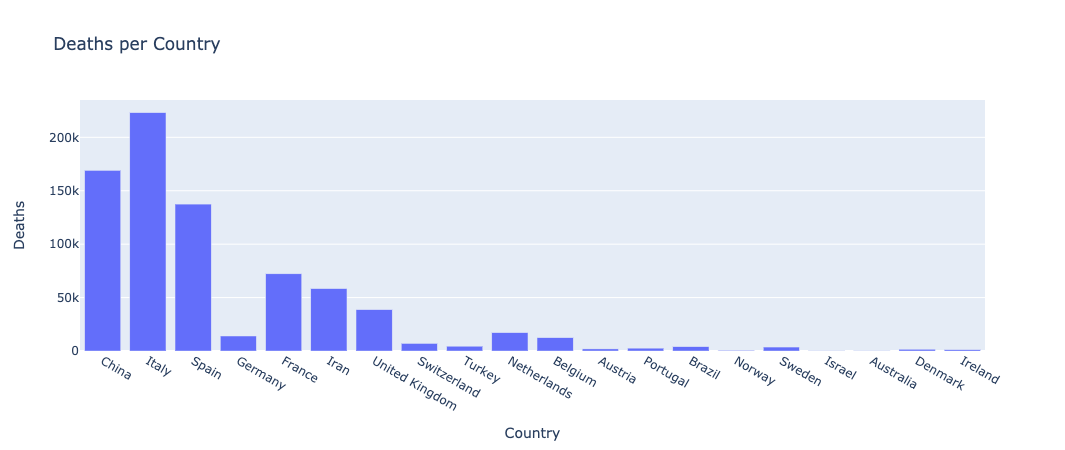

In [234]:
px.bar(covid_per_country[:20], x = 'Country', y='Deaths', title='Deaths per Country')

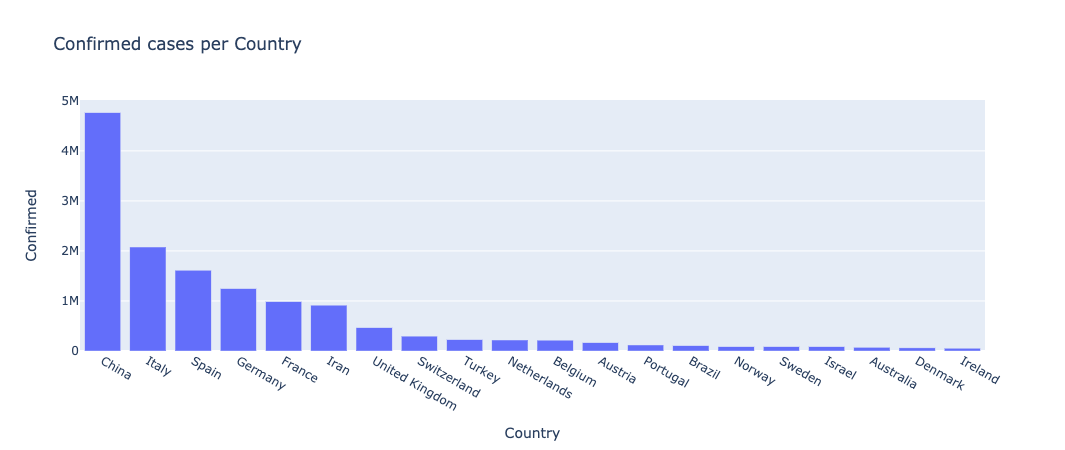

In [235]:
px.bar(covid_per_country[:20], x = 'Country', y='Confirmed', title='Confirmed cases per Country')

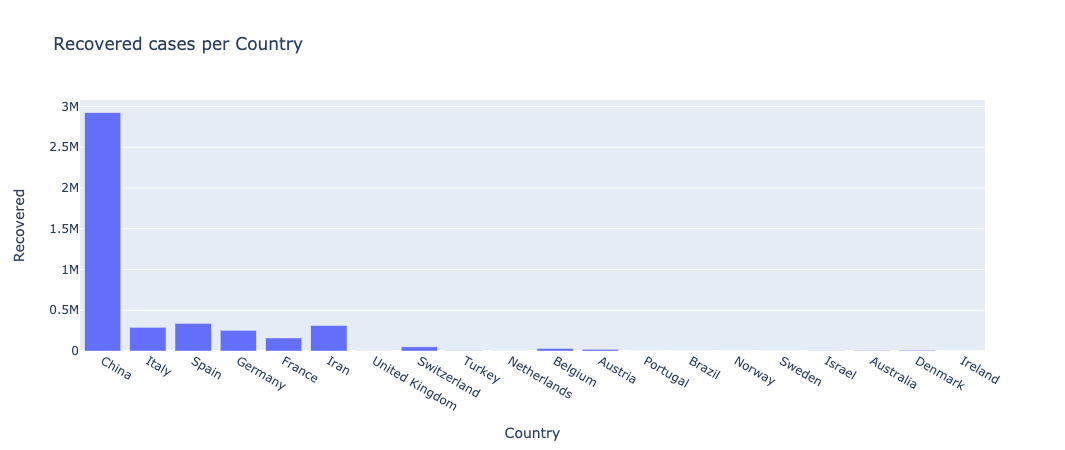

In [236]:
px.bar(covid_per_country[:20], x = 'Country', y='Recovered', title='Recovered cases per Country')

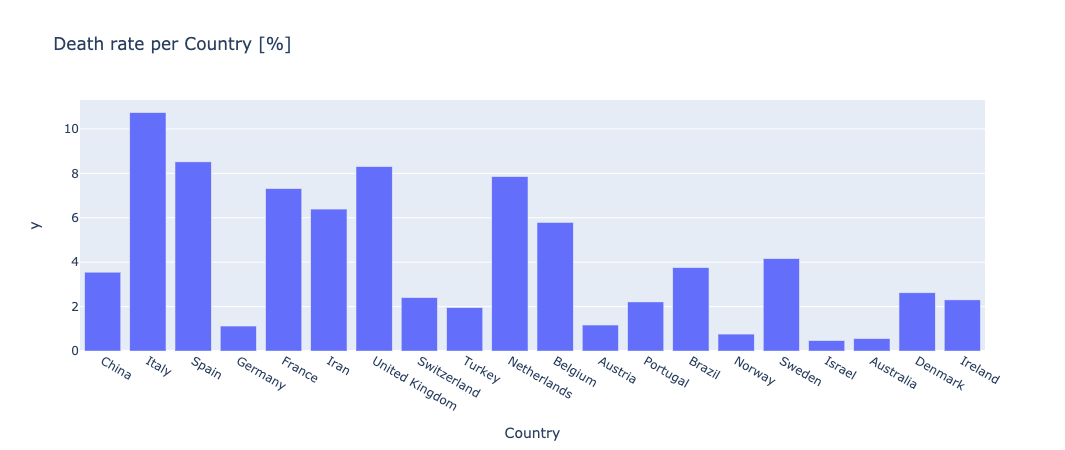

In [237]:
death_rate = (covid_per_country['Deaths'] / covid_per_country['Confirmed']) * 100
px.bar(covid_per_country[:20], x = 'Country', y=death_rate[:20], title='Death rate per Country [%]')

In [238]:
covid_per_country.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'population',
       'continent', 'area', 'borders', 'alpha3'],
      dtype='object')

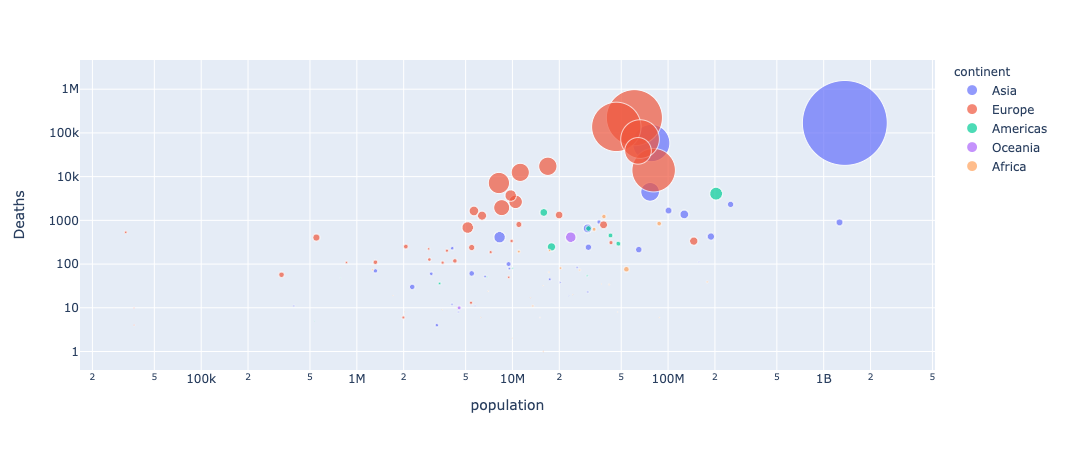

In [240]:
fig = px.scatter(covid_per_country, x="population", y="Deaths", size='Confirmed', color="continent",
           hover_name="Country", log_x=True, log_y=True,size_max=60)
fig.show()

In [254]:
df = pd.read_csv('covid19.csv', index_col='Date')
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population       area  borders  
Date                                                         
2020-01-22    AFG      Asia    26023100   652230.0        6  
2020-01-22    ALB    Europe     2895947    28748.0        4  
2020-01-22    DZA    Africa    38700000  2381741.0        7  
2020-01-22    AGO    Africa    24383301  1246700.0        4  
2020-01-22    ARG  Americas    42669500  2780400.0        5

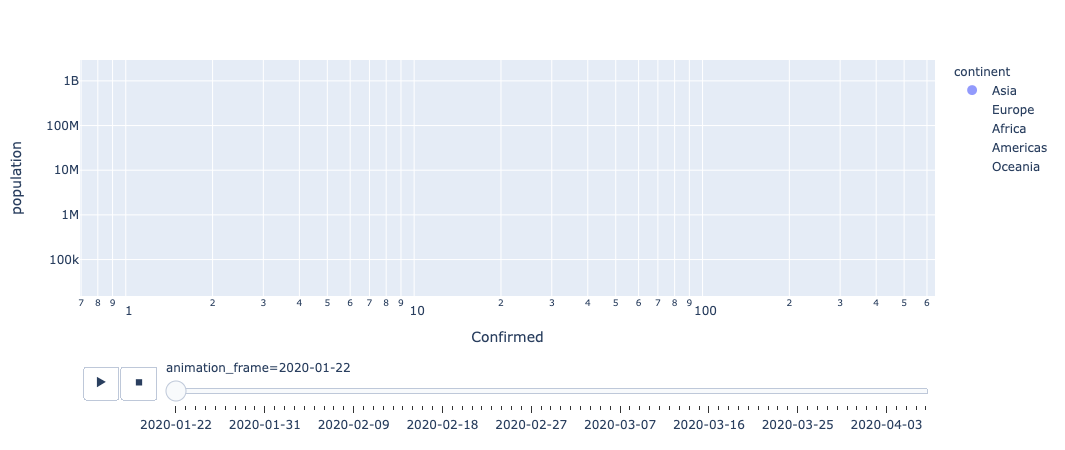

In [263]:
fig = px.scatter(df, x="Confirmed", y="population", size='Deaths', size_max=40,
                 color="continent", hover_name="Country", log_x=True, log_y=True,
                 animation_frame=df.index, animation_group="Country")
fig.show()

In [268]:
europe = df[df['continent'] == 'Europe']

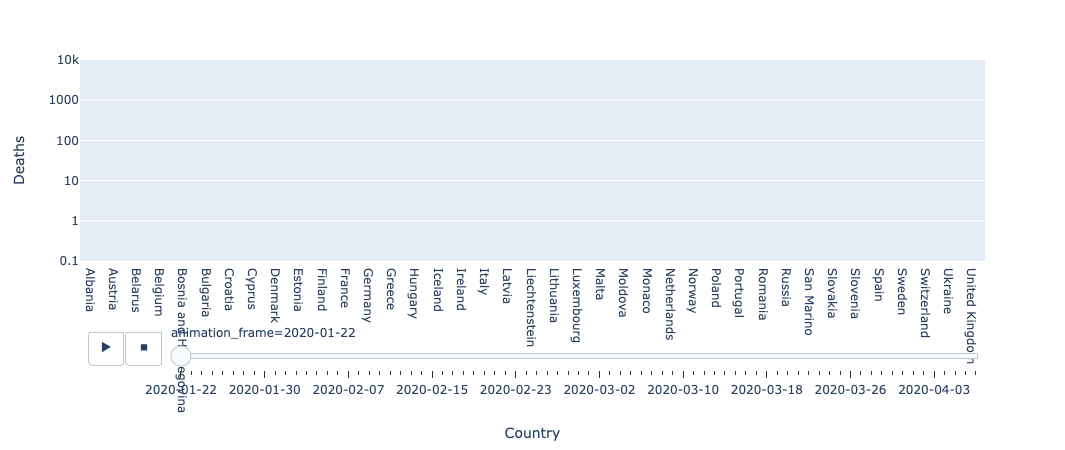

In [277]:
fig = px.bar(europe, x = europe['Country'], y = europe['Deaths'], log_y=True,
            animation_frame=europe.index, animation_group="Country")
fig.show()

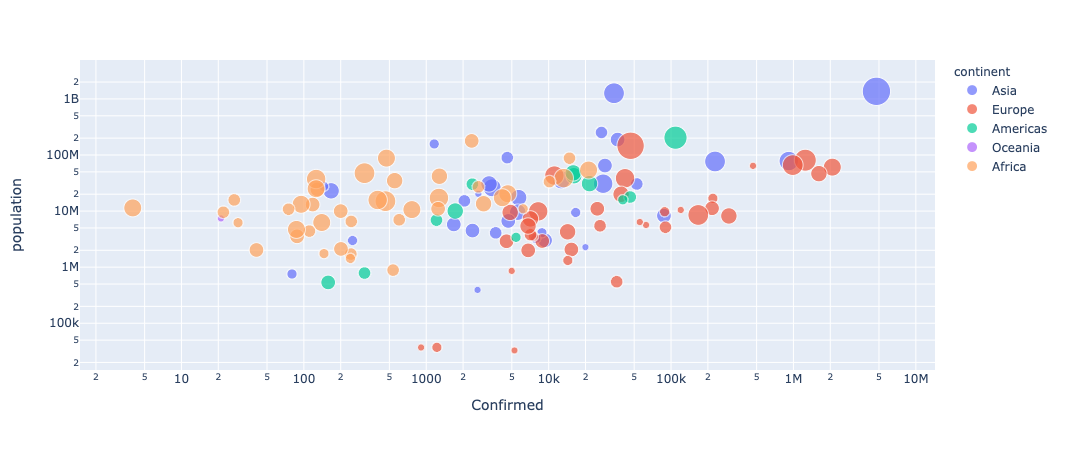

In [276]:
fig = px.scatter(covid_per_country, x='Confirmed', y = 'population',size = 'borders', color='continent', log_y=True, log_x=True,
                hover_name='Country')
fig.show()

In [278]:
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]